# **Machine Learning - Classification Model**
## **Project: Job Change of Data Scientists**

## **Introduction**
 A company wants to hire data scientists among people who successfully pass some courses which conduct by the company, and wants to know which of these candidates are really want to work for the company after training or looking for new employment because it helps to reduce the cost and time.
#### We will answer some questions, which are:
> * #### What are the most important features for `target`?
> * #### What is the best resample method that give us the best accuracy?
> * #### What is the best model for this project?


## **About the dataset**
The dataset called "HR Analytics: Job Change of Data Scientists", it was downloaded from Kaggle,
the data contains more than 19K observations and 14 features. The most important one is "target", which will tell us if the candidate is looking for job change or not.

#### you can find and download the dataset from [here](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)


### **Data Features**<br>
    
>#### **1. enrollee_id**
Unique ID for candidate.

>#### **2. city**
City code.

>#### **3. city_development_index**
Developement index of the city (scaled).

>#### **4. gender**
Gender of candidate.

>#### **5. relevent_experience**
Relevant experience of candidate.

>#### **6. enrolled_university**
Type of University course enrolled if any.

>#### **7. education_level**
Education level of candidate.

>#### **8. major_discipline**
Education major discipline of candidate.

>#### **9. experience**
Candidate total experience in years.

>#### **10. company_size**
Number of employees in current employer's company.

>#### **11. company_type**
Type of current employer.

>#### **12. LastNewJob**
Difference in years between previous job and current job.

>#### **13. training_hours**
training hours completed.

>#### **14. target**
0 – Not looking for job change<br>
1 – Looking for a job change


----

# **Part 1: Exploratory Data Analysis (EDA)**

### Import libraries and load the dataset

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, SVMSMOTE,  RandomOverSampler, BorderlineSMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [161]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Summary and statistical information on the dataset

In [162]:
df.shape

(19158, 14)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [164]:
df.describe(include='O').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


- #### As shown there is a huge difference between 75% percentile and maximum values in training hours column<br> which is an indication of outliers.

In [166]:
print(df.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


### Remove useless features

In [167]:
df.drop(['enrollee_id'], axis='columns', inplace=True)

df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Delete duplicate observations

In [168]:
print(df.duplicated().sum())

49


In [169]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

### Change the feature and categorical names to clearer names

In [170]:
df.rename(columns = {'target':'looking_for_job'}, inplace=True)

df['education_level'] = df.education_level.replace({'Graduate':'bachelor'})

df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,looking_for_job
0,city_103,0.920,Male,Has relevent experience,no_enrollment,bachelor,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,bachelor,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,bachelor,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,bachelor,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


-----

### Showing the correlation between the features

<AxesSubplot:>

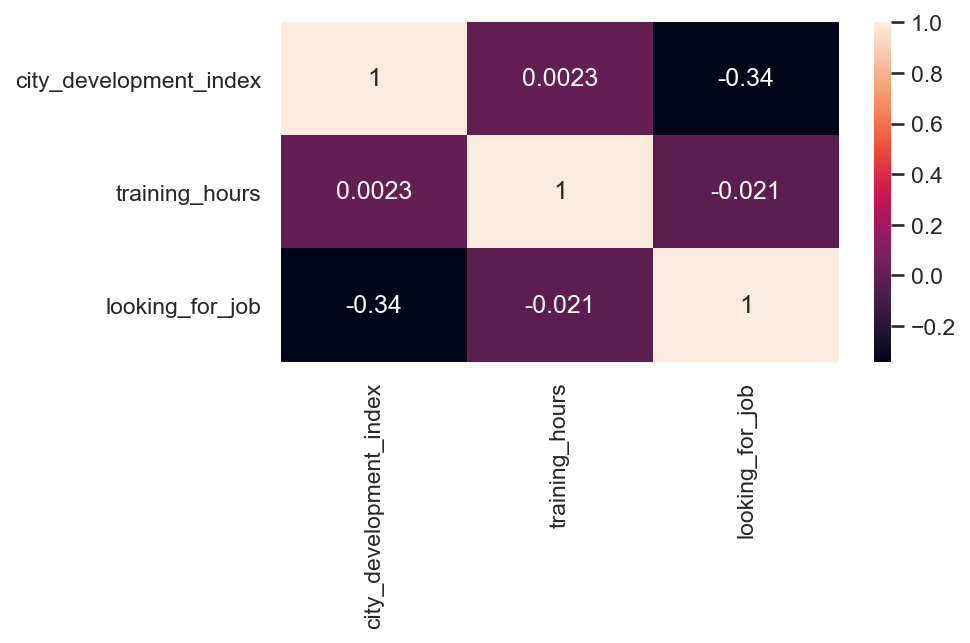

In [171]:
plt.figure(figsize=(6,3), dpi=150)
sns.heatmap(df.corr(), annot=True)

- #### Relationship between `city_development_index` and `looking_for_job`

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

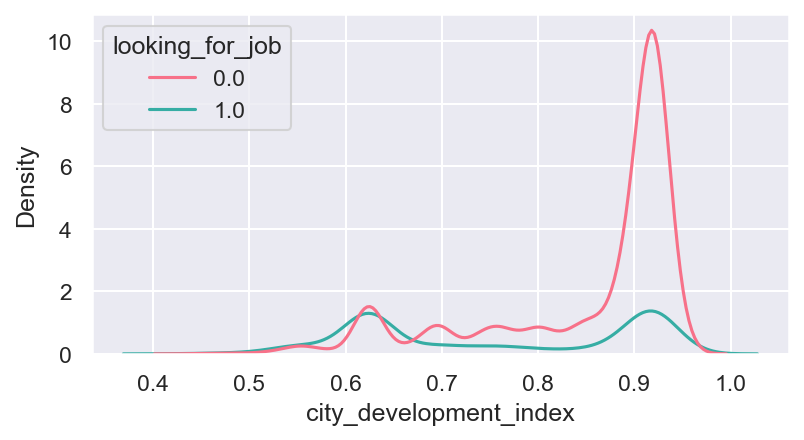

In [172]:
plt.figure(figsize=(6,3), dpi=150)
sns.kdeplot(data=df, x='city_development_index', hue='looking_for_job', palette='husl')


- #### Relationship between `training_hours` and `looking_for_job`

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

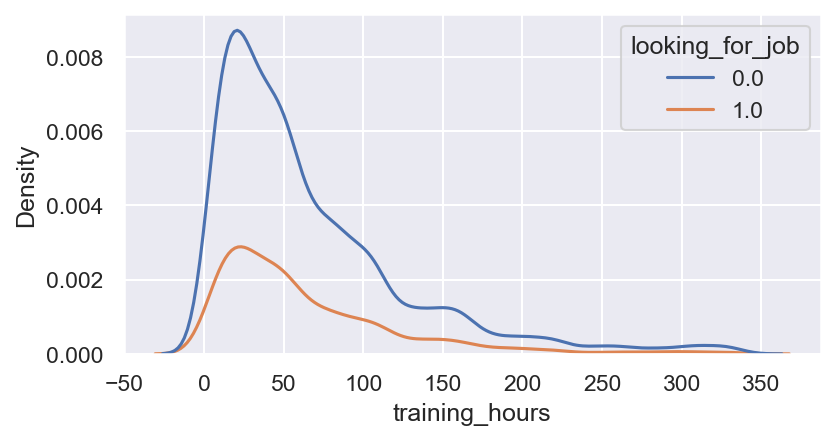

In [173]:
plt.figure(figsize=(6,3), dpi=150)
sns.kdeplot(data=df, x='training_hours', hue='looking_for_job')

- #### Relationship between `experience` and `education_level`

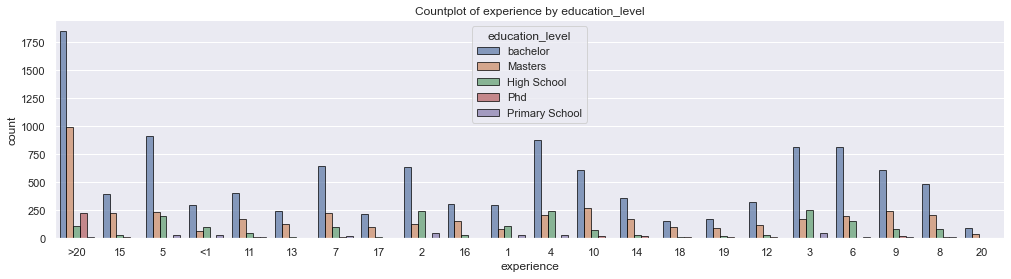

In [174]:
plt.figure(figsize=[17,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

- #### To avoid Data leakage when making some transformation, splitting first is the best approach.

In [ ]:
# X, y = df.drop('looking_for_job',axis=1), df['looking_for_job']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=3, stratify=y)

### Splitting the data into train dataset and test dataset

In [175]:
X, y = df.drop('looking_for_job',axis=1), df['looking_for_job']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=3)

### Filling NaN values in train dataset

In [176]:
for column in ['gender','enrolled_university','education_level','major_discipline', 'experience', 'company_size', 'company_type','last_new_job']:
    X_train[column].fillna(X_train[column].mode()[0], inplace=True)
X_train.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

### Labeling the data in train dataset

In [177]:
labelencoder = LabelEncoder()

for column in ['city','gender','enrolled_university','education_level','relevent_experience','major_discipline', 'experience', 'company_size', 'company_type','last_new_job']:
    X_train[column] = (labelencoder.fit_transform(X_train[column]))
X_train.head(15)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
8305,57,0.764,1,1,2,4,5,15,4,5,1,36
10682,112,0.923,1,0,2,4,5,1,4,5,0,61
2647,64,0.624,1,1,0,0,5,20,4,5,5,96
11380,56,0.776,1,0,2,4,5,10,2,5,4,81
16111,2,0.887,1,0,1,0,5,13,0,5,0,14
8766,5,0.920,1,0,2,4,5,10,3,5,0,44
19003,114,0.925,1,1,2,4,5,21,7,0,4,46
16109,5,0.920,1,0,2,4,5,1,3,5,3,165
16581,116,0.698,1,0,1,4,5,1,0,2,0,64
13197,5,0.920,1,1,2,4,2,21,4,4,4,43


### Filling NaN values in validation dataset

In [178]:
for column in ['gender','enrolled_university','education_level','major_discipline', 'experience', 'company_size', 'company_type','last_new_job']:
    X_test[column].fillna(X_test[column].mode()[0], inplace=True)
X_test.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

### Labeling the data in validation dataset

In [179]:
labelencoder = LabelEncoder()

for column in ['city','gender','enrolled_university','education_level','relevent_experience','major_discipline', 'experience', 'company_size', 'company_type','last_new_job']:
    X_test[column] = (labelencoder.fit_transform(X_test[column]))
X_test.head(15)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
3492,5,0.920,1,1,2,3,5,13,4,5,5,15
17265,5,0.920,1,1,2,4,4,2,4,5,4,74
12665,5,0.920,1,0,2,4,5,15,4,5,0,28
18251,97,0.579,1,0,1,4,5,16,1,1,0,17
6721,15,0.743,1,0,2,1,4,16,2,5,0,4
14710,13,0.926,1,0,2,4,5,3,2,5,3,42
2562,86,0.913,1,0,2,4,5,21,7,5,1,3
10341,5,0.920,1,0,2,4,4,9,4,5,3,45
6372,46,0.910,1,1,0,4,5,11,1,5,0,28
2360,5,0.920,1,1,2,3,5,14,4,5,5,30


### Showing the most important features in the dataset

- #### Feature importance gives insight of features behavior towards `looking_for_job`.

In [180]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [181]:
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['dfcolumns', 'dfscores']
featureScores.sort_values(by='dfcolumns')
featureScores.nlargest(13, 'dfscores')

,dfcolumns,dfscores
0,city,1209.265230
11,training_hours,265.427243
3,relevent_experience,170.320270
4,enrolled_university,114.273199
5,education_level,76.131940
8,company_size,30.127767
1,city_development_index,27.700715
9,company_type,15.335483
10,last_new_job,13.603395
7,experience,2.985278


[0.09514659 0.17157048 0.0210808  0.01990768 0.03011697 0.036467
 0.02468228 0.15551522 0.08268198 0.03326965 0.0739948  0.25556655]


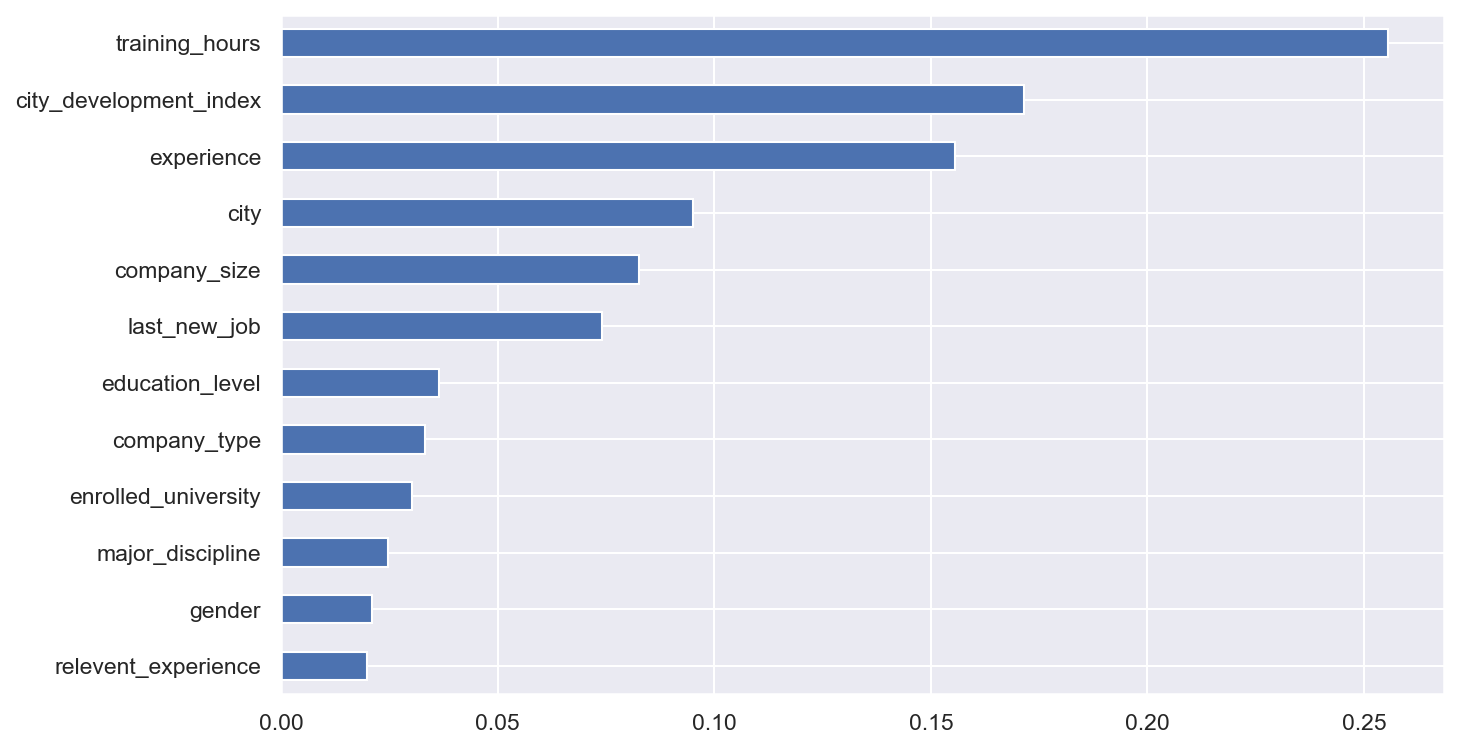

In [182]:
plt.figure(figsize=(10,6), dpi=150)
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).sort_values(ascending=True).plot(kind='barh')
plt.show()

### What are the most important features for the `target`?

#### As can be shown above, the most important features are `training_hours`, `city_development_index`, and `experience`.

---

### Dealing with imbalanced data

- Best way to improve imbalanced classes performance is to try different approaches until the best model accuracy is achieved. <br>Hence for this particular data, the class one (the candidate is looking for a job in different company after training course) is the priority<br> without losing too much accuracy in class 0.<br>

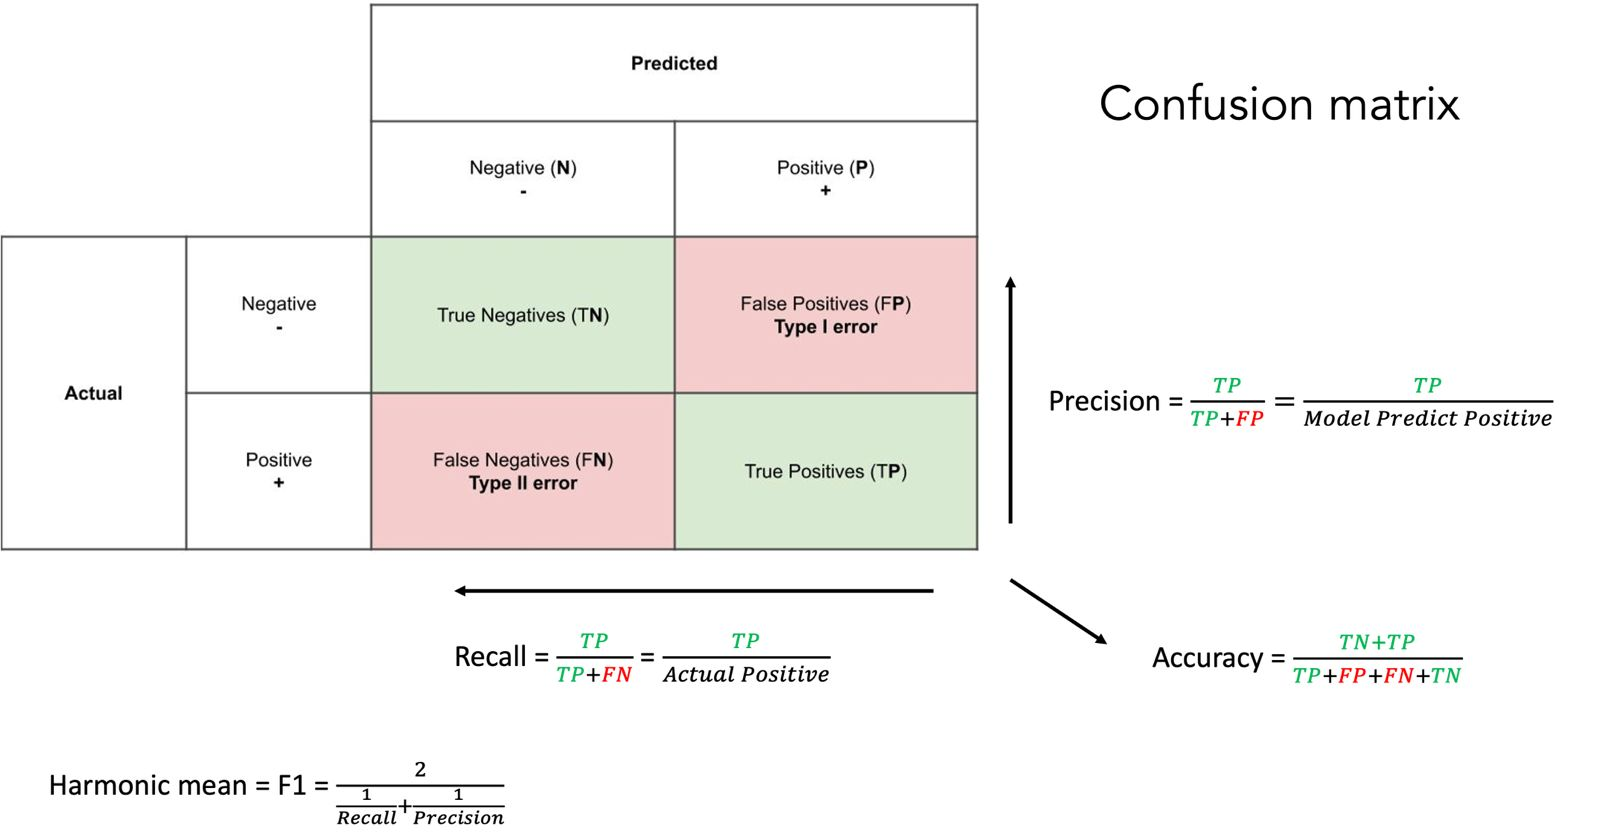<br>




- #### The cell below for implementing various over, under, combined and random sampling approaches.

In [183]:
# smote = SMOTEENN(random_state=101)   #gave us the best accuracy
# X_train_os, y_train_os = smote.fit_resample(X_train,y_train)

# ///------------------------------------------------------

# svm_smote = SMOTE( random_state=101) 
# X_train_os, y_train_os = svm_smote.fit_resample(X_train,y_train)

# ///------------------------------------------------------

# adasyn = ADASYN(random_state = 101)
# X_train_os, y_train_os = adasyn.fit_resample(X_train,y_train)

# ///------------------------------------------------------

# bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
# X_train_os, y_train_os = bsmote.fit_resample(X_train, y_train)

# ///------------------------------------------------------

# smotenc = SMOTENC([1],random_state = 101)
# X_train_os_ros, y_train_os_ros = smotenc.fit_resample(X_train_os, y_train_os)


# ///------------------------------------------------------

# over = RandomOverSampler(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.8)
# # first performing oversampling to minority class
# X_train_os, y_train_os = over.fit_resample(X_train_os, y_train_os)
# print(f"Oversampled: {Counter(y_over)}")
# Oversampled: Counter({0: 9844, 1: 4922})
# # now to comine under sampling 
# X_train_os, y_train_os = under.fit_resample(X_train, y_train)
# print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")
# Combined Random Sampling: Counter({0: 6152, 1: 4922})

# adasyn = ADASYN(random_state = 101)
# X_train_os, y_train_os = adasyn.fit_resample(X_train,y_train)

# ///------------------------------------------------------

# svm_smote = SMOTE(random_state=101) 
# X_train_os_ros, y_train_os_ros = svm_smote.fit_resample(X_train_os,y_train_os)


# ///------------------------------------------------------

# smote = SMOTEENN(random_state=101) 
# X_train_os_ros, y_train_os_ros = smote.fit_resample(X_train_os,y_train_os)

# ///------------------------------------------------------

# from imblearn.combine import SMOTETomek
# bsmote = SMOTETomek()
# X_train_os, y_train_os = bsmote.fit_resample(X_train, y_train)

# ///------------------------------------------------------

ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)


# params = {'objective':'binary',
#           'metric' : 'auc',
#           'boosting_type' : 'gbdt',
#           'colsample_bytree' : 0.9234,
#           'num_leaves' : 13,
#           'max_depth' : -1,
#           'n_estimators' : 200,
#           'min_child_samples': 399, 
#           'min_child_weight': 0.1,
#           'reg_alpha': 2,
#           'reg_lambda': 5,
#           'subsample': 0.855,
#           'verbose' : -1,
#           'num_threads' : 4
# }

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_os)
X_test_scaled = sc.transform(X_test)

### What is the best resample method that give us the best accuracy?

#### By evaluation the models, we found out that the best resample method that gives us the best accuracy is RandomOverSampler

- ### Class distribution before/after sampling

<AxesSubplot:ylabel='looking_for_job'>

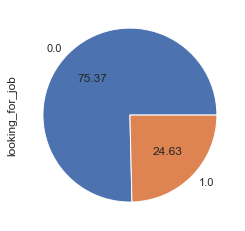

In [184]:
y_train.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='looking_for_job'>

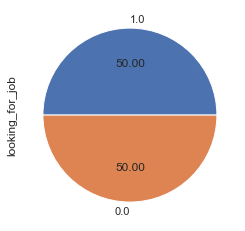

In [185]:
y_train_os.value_counts().plot.pie(autopct='%.2f')

---

# **Part 2: Machine Learning Model**

- #### Function to plot confiusion matrix, recall, f1score and roc for each algorithm results.

In [186]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))

    sns.set(font_scale=1)
    labels = [0,1]
    # representing A in heatmap format
    cmap1=sns.light_palette("orange")
    cmap2=sns.light_palette("#34c3eb")
    cmap3=sns.light_palette("purple")
    
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap2, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap3, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()


def plot_roc_auc(y_test,y_pred):
    from plot_metric.functions import BinaryClassification
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 0"])

    # Figures
    plt.figure(figsize=(8,7))
    bc.plot_roc_curve()
    
    plt.show()
result = []

----

## 1. K-Nearest Neighbor (KNN) Algorithm

Fitting 10 folds for each of 76 candidates, totalling 760 fits


RESULTS :
KNN Model Acc :  0.67
KNN Model F1-score :  0.53


{'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}


Classification Report :
               precision    recall  f1-score   support

         0.0       0.87      0.65      0.75      4262
         1.0       0.42      0.71      0.53      1471

    accuracy                           0.67      5733
   macro avg       0.64      0.68      0.64      5733
weighted avg       0.75      0.67      0.69      5733





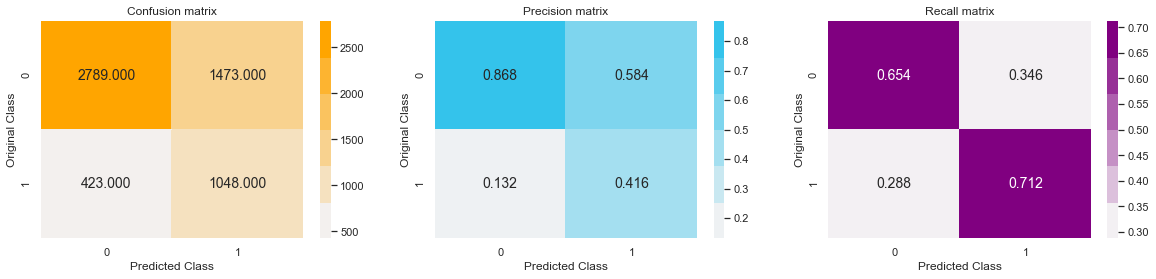

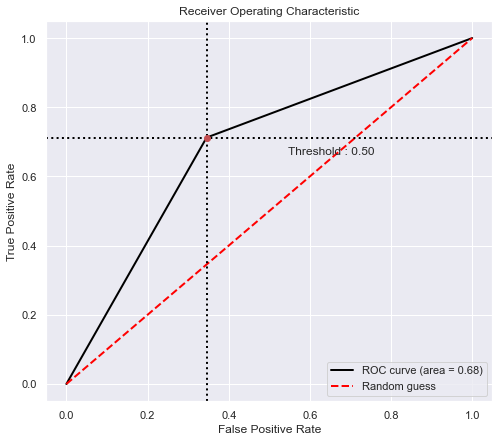

In [187]:
knn_param_grid = {"n_neighbors": range(1,20),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid=knn_param_grid, cv = 10, 
                   scoring = "recall", n_jobs = -1,verbose = 1)
clf_knn.fit(X_train_scaled,y_train_os)
y_pred_knn = clf_knn.predict(X_test_scaled)
cm_random_knn = confusion_matrix(y_test,y_pred_knn)
acc_random_knn = accuracy_score(y_test, y_pred_knn)
fscore = f1_score(y_test,y_pred_knn)
result.append(acc_random_knn)

print('\n')
print("RESULTS :")
print("KNN Model Acc : ",round(acc_random_knn,2))
print("KNN Model F1-score : ",round(fscore,2))
print('\n')
print(clf_knn.best_params_)
print('\n')
print("Classification Report :\n",classification_report(y_test,y_pred_knn))
print('\n')
plot_confusion_matrix(y_test, y_pred_knn)
print('\n')
plot_roc_auc(y_test,y_pred_knn)

## 2. XGBoost Algorithm - grid search

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[13:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RESULTS :
KNN Model Acc :  0.74
KNN Model F1-score :  0.47


{'colsample_bytree': 0.7, 'max_depth': 12, 'min_child_weight': 5, 'n_estimators': 400, 'nthread': 1, 'objective': 'binary:logistic', 'seed': 1337, '

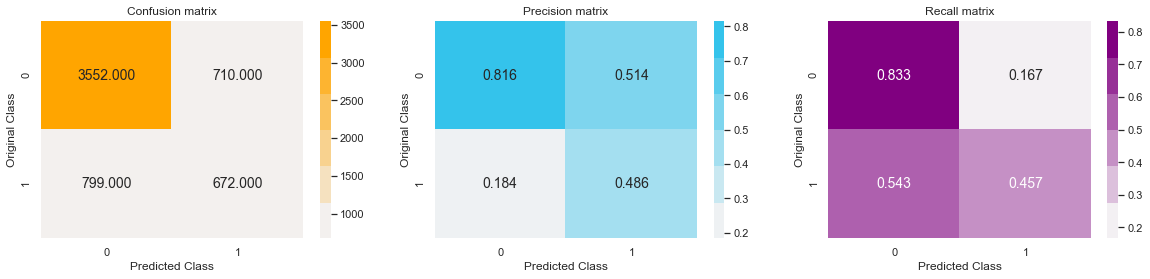

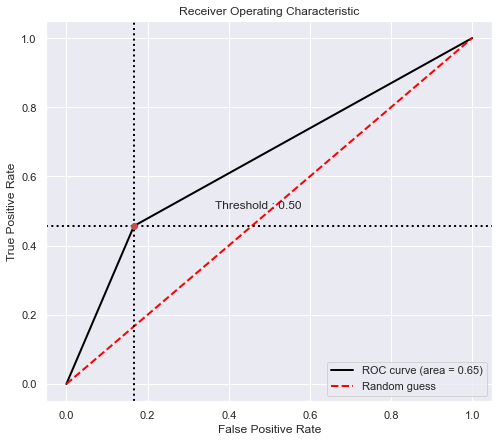

In [188]:
parameters = {'nthread':[1], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'max_depth':[4,5,6,7,8,9,10,11,12],
              'min_child_weight': [5,6,7,8,9,10],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators':  [100, 200,300,400], #number of trees, change it to 1000 for better results
              'seed': [1337]}

XGB = xgb.XGBClassifier()
XGB = GridSearchCV(XGB, parameters, cv = 5, scoring='roc_auc',verbose=1, refit=True, n_jobs= -1)
XGB.fit(X_train_os, y_train_os)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb,y_test)
fscore = f1_score(y_test,y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result.append(acc_xgb)


print('\n')
print("RESULTS :")
print("KNN Model Acc : ",round(acc_xgb,2))
print("KNN Model F1-score : ",round(fscore,2))
print('\n')
print(XGB.best_params_)
print('\n')
print("Classification Report :\n",classification_report(y_test,y_pred_xgb))
print('\n')
plot_confusion_matrix(y_test, y_pred_xgb)
print('\n')
plot_roc_auc(y_test,y_pred_xgb)

 ## 3. Random Forest Algorithm

RESULTS :
Random Forest Model Accuracy :  0.75
Random Forest Model F1-score :  0.55
Classification Report :
               precision    recall  f1-score   support

         0.0       0.85      0.80      0.83      4262
         1.0       0.51      0.60      0.55      1471

    accuracy                           0.75      5733
   macro avg       0.68      0.70      0.69      5733
weighted avg       0.77      0.75      0.76      5733





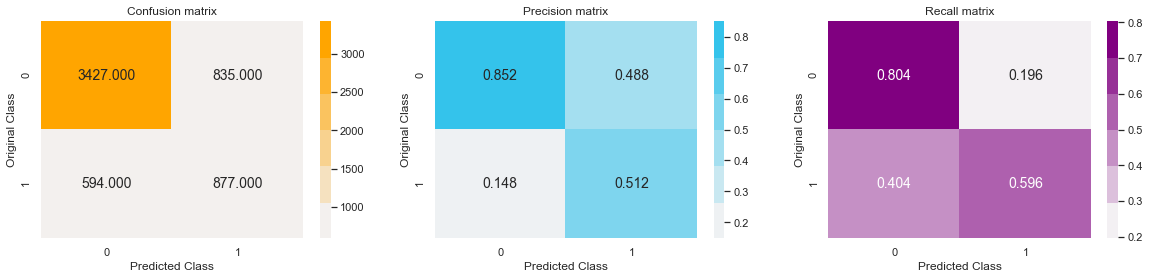

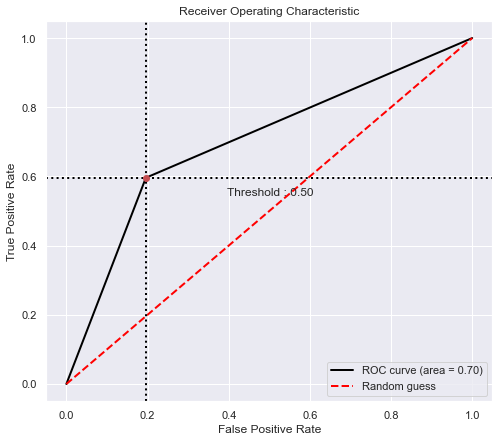

In [189]:
random_forest_model = RandomForestClassifier(max_depth=2, random_state= 59, n_estimators= 700)
random_forest_model.fit(X_train_os, y_train_os)
y_pred_random_forest = random_forest_model.predict(X_test)
cm_random_forest = confusion_matrix(y_pred_random_forest,y_test)
fscore = f1_score(y_test,y_pred_random_forest)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)

print("RESULTS :")
print("Random Forest Model Accuracy : ",round(acc_random_forest,2))
print("Random Forest Model F1-score : ",round(fscore,2))
print("Classification Report :\n", classification_report(y_test,y_pred_random_forest))
print('\n')
plot_confusion_matrix(y_test, y_pred_random_forest)
print('\n')
plot_roc_auc(y_test,y_pred_random_forest)

- ### Random Forest Algorithm - Grid Search

RESULTS :
Random Forest Model Accuracy :  0.75
Random Forest Model F1-score :  0.5


{'max_features': 'sqrt', 'n_estimators': 61}


Classification Report :
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      4262
         1.0       0.52      0.48      0.50      1471

    accuracy                           0.75      5733
   macro avg       0.67      0.66      0.67      5733
weighted avg       0.75      0.75      0.75      5733





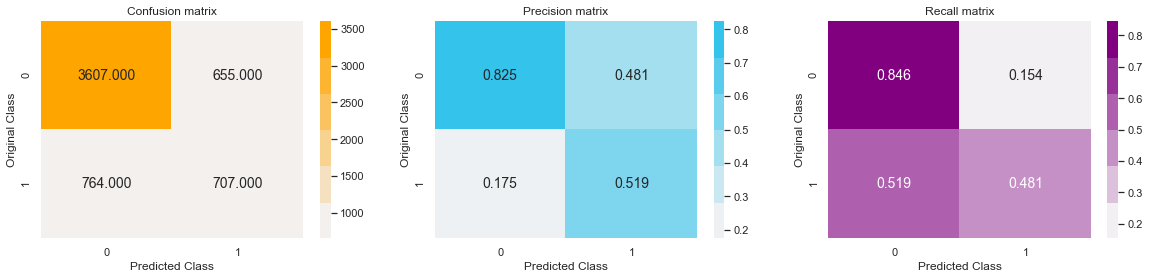

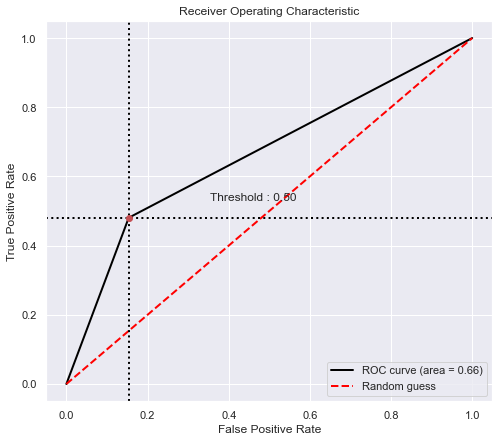

In [190]:
parameters = [{'n_estimators': range(10,100), 'max_features': ['auto', 'sqrt', 'log2']},
              { 'min_samples_split': range(2,8),'criterion' :['gini', 'entropy']}]
rf_clf = RandomForestClassifier()
rf_gs = GridSearchCV(estimator = rf_clf, param_grid = parameters, scoring = 'recall', cv = 5, n_jobs = -1)

rf_gs.fit(X_train_scaled, y_train_os)
y_pred_random_forest = rf_gs.predict(X_test_scaled)
cm_random_forest = confusion_matrix(y_pred_random_forest,y_test)
fscore = f1_score(y_test,y_pred_random_forest)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)

print("RESULTS :")
print("Random Forest Model Accuracy : ",round(acc_random_forest,2))
print("Random Forest Model F1-score : ",round(fscore,2))
print('\n')
print(rf_gs.best_params_)
print('\n')
print("Classification Report :\n", classification_report(y_test,y_pred_random_forest))
print('\n')
plot_confusion_matrix(y_test, y_pred_random_forest)
print('\n')
plot_roc_auc(y_test,y_pred_random_forest)

## 4. Light Gradient Boosting Machine (LightGBM) Algorithm

RESULTS :
LGB Model Accuracy :  0.75
LGB Model F1-score :  0.6
Classification Report :
               precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      4262
         1.0       0.51      0.72      0.60      1471

    accuracy                           0.75      5733
   macro avg       0.70      0.74      0.71      5733
weighted avg       0.79      0.75      0.76      5733





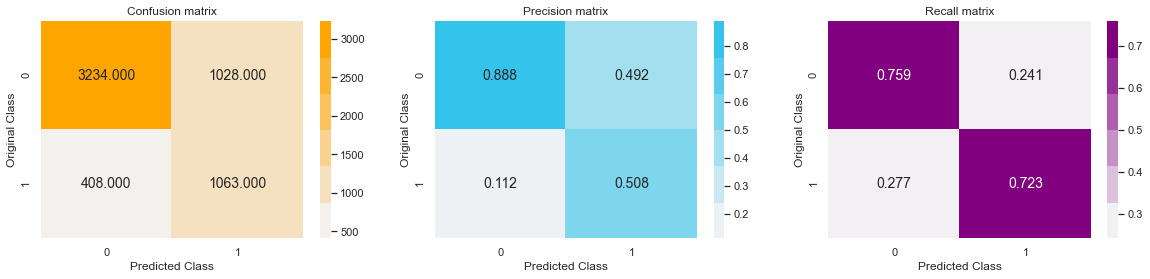

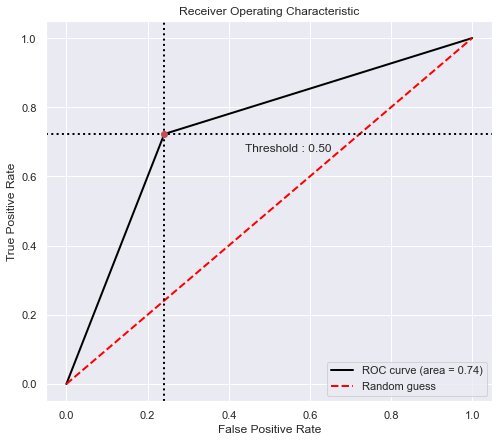

In [191]:
clf_lgb = lgb.LGBMClassifier()
clf_lgb.fit(X_train_scaled,y_train_os)
y_pred=clf_lgb.predict(X_test_scaled)
y_pt = clf_lgb.predict(X_train_os)
fscore = f1_score(y_test,y_pred)
acc_lgb = accuracy_score(y_pred, y_test)
result.append(acc_lgb)

print("RESULTS :")
print("LGB Model Accuracy : ",round(acc_lgb,2))
print("LGB Model F1-score : ",round(fscore,2))
print("Classification Report :\n", classification_report(y_test,y_pred))
print('\n')
plot_confusion_matrix(y_test, y_pred)
print('\n')
plot_roc_auc(y_test,y_pred)

- ### Light Gradient Boosting Machine (LightGBM) Algorithm - Randomized Search

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: 135


RESULTS :
{'scale_pos_weight ': 135, 'objective': 'binary', 'num_leaves': 13, 'n_estimators': 192, 'boosting_type': 'dart'}


LGB Model Accuracy :  0.75
LGB Model F1-score :  0.6
Classification Report :
               precision    recall  f1-score   support

         0.0       0.89      0.75      0.82      4262
         1.0       0.50      0.74      0.60      1471

    accuracy                           0.75      5733
   macro avg       0.70      0.74      0.71      5733
weighted avg       0.79      0.75      0.76      5733





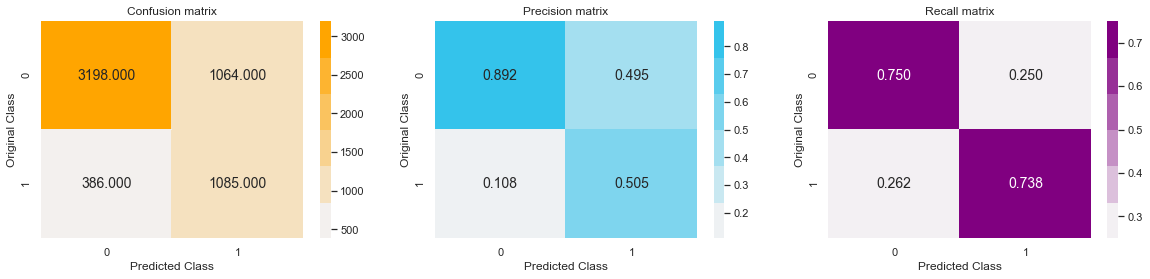

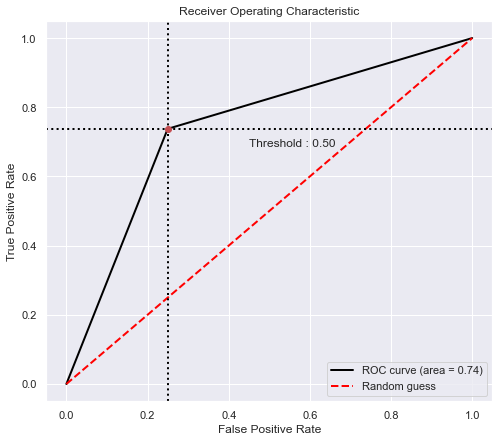

In [192]:
gridParams = {
    
    'n_estimators': range(1,200),
    'num_leaves': range(1,15),
    'scale_pos_weight ':range(1,150),# large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['dart'], # for better accuracy -> try dart
    'objective' : ['binary']
   }

lgb_gs = RandomizedSearchCV(clf_lgb, param_distributions=gridParams , cv = 5, scoring='recall',verbose=1, refit=True, n_jobs= -1)
lgb_gs.fit(X_train_scaled, y_train_os)
y_pred=lgb_gs.predict(X_test_scaled)
cm_lgb = confusion_matrix(y_pred,y_test)
fscore = f1_score(y_test,y_pred)
acc_lgb = accuracy_score(y_test, y_pred)
result.append(acc_lgb)
print('\n')
print("RESULTS :")
print(lgb_gs.best_params_)
print('\n')
print("LGB Model Accuracy : ",round(acc_lgb,2))
print("LGB Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(y_test,y_pred))
print('\n')
plot_confusion_matrix(y_test, y_pred)
print('\n')
plot_roc_auc(y_test,y_pred)

## 5. Support Vector Machine Algorithm

RESULTS :
SVM Model Accuracy :  0.73
SVM Model F1-score :  0.55
Classification Report :

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80      4262
         1.0       0.47      0.65      0.55      1471

    accuracy                           0.73      5733
   macro avg       0.67      0.70      0.68      5733
weighted avg       0.76      0.73      0.74      5733





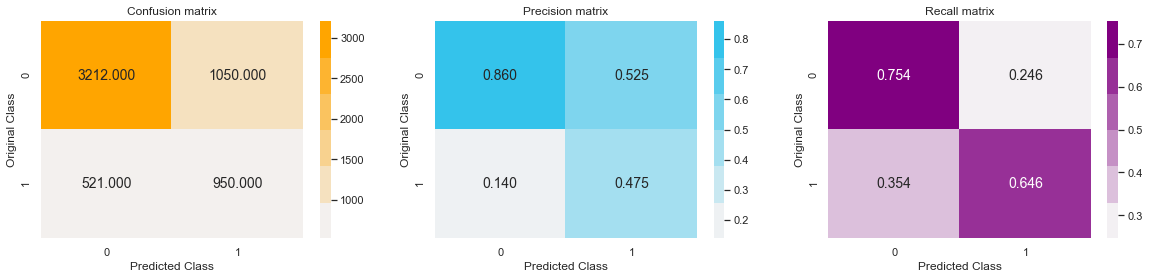

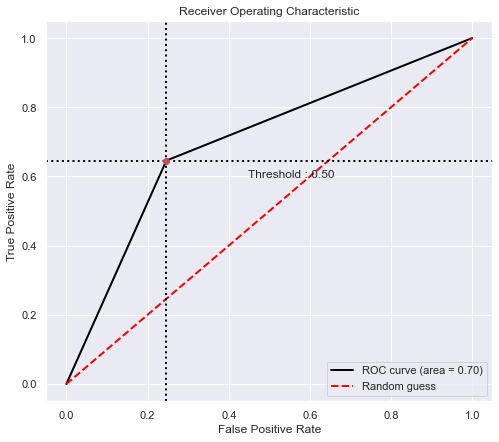

In [193]:
clf_svm =  SVC(gamma='auto')
clf_svm.fit(X_train_scaled, y_train_os)
y_pred=clf_svm.predict(X_test_scaled)
cm_svm = confusion_matrix(y_pred,y_test)
fscore = f1_score(y_test,y_pred)
acc_svm = accuracy_score(y_pred, y_test)
result.append(acc_svm)

print("RESULTS :")
print("SVM Model Accuracy : ",round(acc_svm,2))
print("SVM Model F1-score : ",round(fscore,2))
print("Classification Report :\n")
print(classification_report(y_test,y_pred))
print('\n')
plot_confusion_matrix(y_test, y_pred)
print('\n')
plot_roc_auc(y_test,y_pred)

- ### Support Vector Machine Algorithm - Randomized Search



RESULTS :
{'kernel': 'rbf', 'gamma': 0.9, 'C': 0.75}


SVM Model Accuracy :  0.72
SVM Model F1-score :  0.48
Classification Report :
               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      4262
         1.0       0.46      0.49      0.48      1471

    accuracy                           0.72      5733
   macro avg       0.64      0.65      0.64      5733
weighted avg       0.73      0.72      0.72      5733





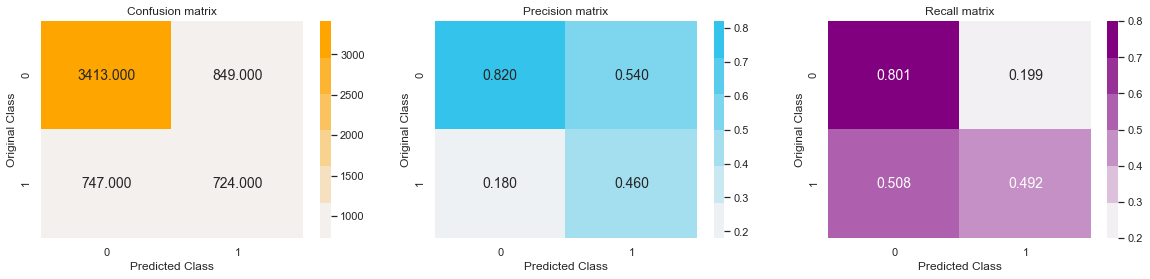

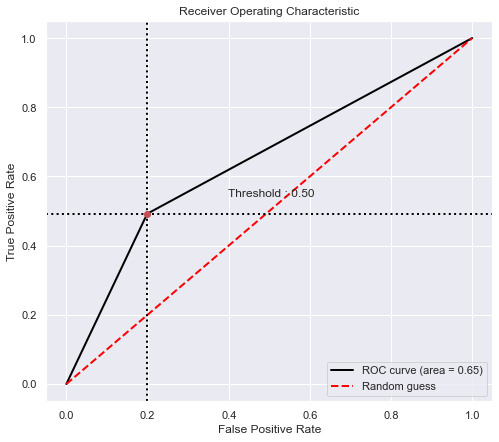

In [194]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

svm_gs = RandomizedSearchCV(estimator = clf_svm, param_distributions = parameters, scoring = 'recall', cv = 10, n_jobs = -1)
svm_gs.fit(X_train_scaled, y_train_os)
y_pred=svm_gs.predict(X_test_scaled)
cm_svm = confusion_matrix(y_pred,y_test)
fscore = f1_score(y_test,y_pred)
acc_svm = accuracy_score(y_test, y_pred)
result.append(acc_svm)
print('\n')
print("RESULTS :")
print(svm_gs.best_params_)
print('\n')
print("SVM Model Accuracy : ",round(acc_svm,2))
print("SVM Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(y_test,y_pred))
print('\n')
plot_confusion_matrix(y_test, y_pred)
print('\n')
plot_roc_auc(y_test,y_pred)

## 6. Logistic Regression Algorithm

RESULTS :
Logistic Regression Model Accuracy :  0.71
Logistic Regression Model F1-score :  0.54
Classification Report :

              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79      4262
         1.0       0.46      0.65      0.54      1471

    accuracy                           0.71      5733
   macro avg       0.66      0.69      0.67      5733
weighted avg       0.76      0.71      0.73      5733





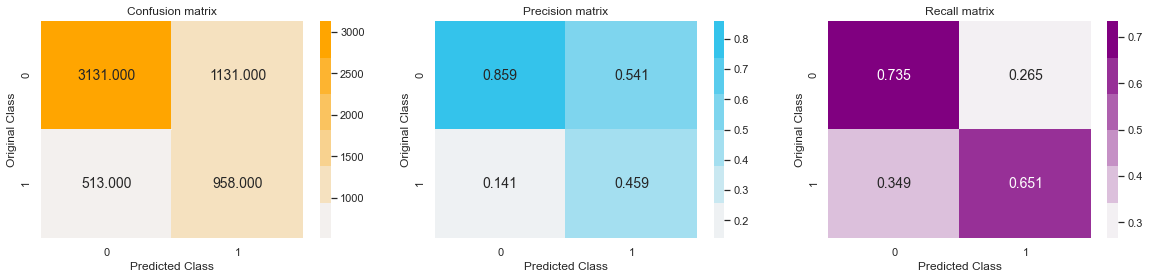

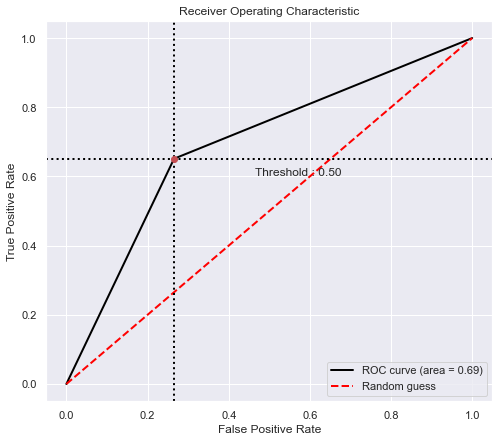

In [195]:
lr_os = LogisticRegression()
lr_os.fit(X_train_scaled, y_train_os)
y_pred = lr_os.predict(X_test_scaled)
cm_lr = confusion_matrix(y_pred,y_test)
fscore = f1_score(y_test,y_pred)
acc_lr = accuracy_score(y_pred, y_test)
result.append(acc_svm)
print("RESULTS :")
print("Logistic Regression Model Accuracy : ",round(acc_lr,2))
print("Logistic Regression Model F1-score : ",round(fscore,2))
print("Classification Report :\n")
print(classification_report(y_test,y_pred))
print('\n')
plot_confusion_matrix(y_test, y_pred)
print('\n')
plot_roc_auc(y_test,y_pred)

## 7. Decision Tree Algorithm



{'criterion': 'gini', 'max_depth': 10}


RESULTS :
Decision Tree Model Accuracy :  0.75
Decision Tree Model F1-score :  0.56


Classification Report :

              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80      4262
         1.0       0.47      0.68      0.56      1471

    accuracy                           0.72      5733
   macro avg       0.67      0.71      0.68      5733
weighted avg       0.77      0.72      0.74      5733





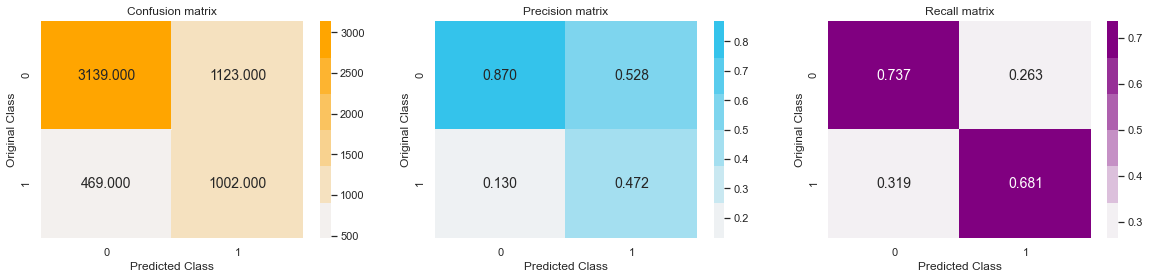

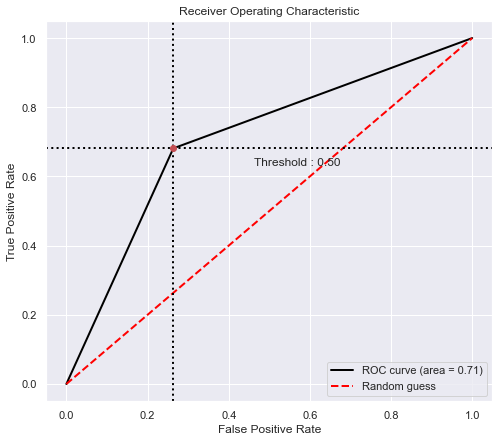

In [196]:
dt = DecisionTreeClassifier()

parameters = [{'criterion': ['entropy', 'gini'], 'max_depth':[4,5,6,7,8,9,10]}]
              
dt_gs = GridSearchCV(estimator = dt,param_grid = parameters, scoring = 'recall', cv = 10, n_jobs = -1)           
dt_gs.fit(X_train_os, y_train_os)
y_pred=dt_gs.predict(X_test)
cm_dt = confusion_matrix(y_pred,y_test)
fscore = f1_score(y_test,y_pred)
print('\n')
print(dt_gs.best_params_)
print('\n')
acc_dt = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_dt)
print("RESULTS :")
print("Decision Tree Model Accuracy : ",round(acc_dt,2))
print("Decision Tree Model F1-score : ",round(fscore,2))
print('\n')
print("Classification Report :\n")
print(classification_report(y_test,y_pred))
print('\n')
plot_confusion_matrix(y_test, y_pred)
print('\n')
plot_roc_auc(y_test,y_pred)

## 8. CatBoost Algorithm - Randomized search

Learning rate set to 0.112065
0:	learn: 0.6639861	total: 153ms	remaining: 45.8s
1:	learn: 0.6290225	total: 438ms	remaining: 1m 5s
2:	learn: 0.5971273	total: 748ms	remaining: 1m 14s
3:	learn: 0.5692485	total: 1.03s	remaining: 1m 16s
4:	learn: 0.5500139	total: 1.26s	remaining: 1m 14s
5:	learn: 0.5309783	total: 1.49s	remaining: 1m 12s
6:	learn: 0.5138753	total: 1.72s	remaining: 1m 11s
7:	learn: 0.5016728	total: 1.93s	remaining: 1m 10s
8:	learn: 0.4888379	total: 2.15s	remaining: 1m 9s
9:	learn: 0.4792149	total: 2.37s	remaining: 1m 8s
10:	learn: 0.4693583	total: 2.59s	remaining: 1m 8s
11:	learn: 0.4586119	total: 2.8s	remaining: 1m 7s
12:	learn: 0.4489635	total: 3.01s	remaining: 1m 6s
13:	learn: 0.4380920	total: 3.22s	remaining: 1m 5s
14:	learn: 0.4317666	total: 3.42s	remaining: 1m 5s
15:	learn: 0.4225567	total: 3.63s	remaining: 1m 4s
16:	learn: 0.4134279	total: 3.83s	remaining: 1m 3s
17:	learn: 0.4092317	total: 4.03s	remaining: 1m 3s
18:	learn: 0.4036042	total: 4.23s	remaining: 1m 2s
19:	le

160:	learn: 0.1525526	total: 29.9s	remaining: 25.8s
161:	learn: 0.1521303	total: 30.1s	remaining: 25.6s
162:	learn: 0.1514176	total: 30.3s	remaining: 25.5s
163:	learn: 0.1508456	total: 30.5s	remaining: 25.3s
164:	learn: 0.1496844	total: 30.7s	remaining: 25.1s
165:	learn: 0.1491693	total: 30.9s	remaining: 24.9s
166:	learn: 0.1485040	total: 31.1s	remaining: 24.8s
167:	learn: 0.1481692	total: 31.3s	remaining: 24.6s
168:	learn: 0.1470687	total: 31.5s	remaining: 24.4s
169:	learn: 0.1463806	total: 31.7s	remaining: 24.3s
170:	learn: 0.1460833	total: 31.9s	remaining: 24.1s
171:	learn: 0.1454264	total: 32.1s	remaining: 23.9s
172:	learn: 0.1449794	total: 32.3s	remaining: 23.7s
173:	learn: 0.1444103	total: 32.5s	remaining: 23.6s
174:	learn: 0.1438289	total: 32.7s	remaining: 23.4s
175:	learn: 0.1431498	total: 32.9s	remaining: 23.2s
176:	learn: 0.1423030	total: 33.1s	remaining: 23s
177:	learn: 0.1415627	total: 33.3s	remaining: 22.8s
178:	learn: 0.1404003	total: 33.5s	remaining: 22.7s
179:	learn: 0.

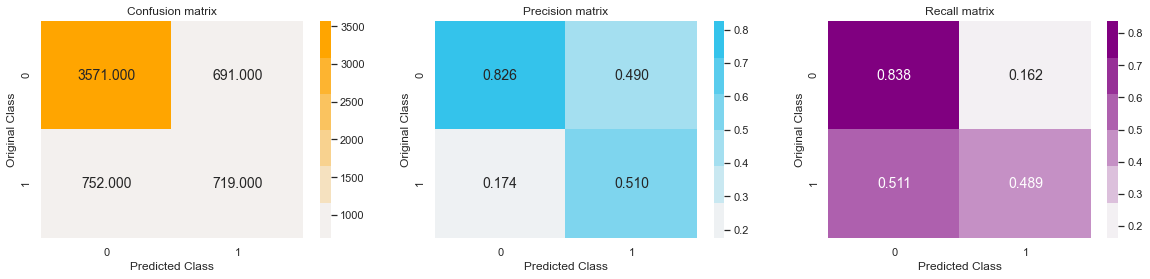

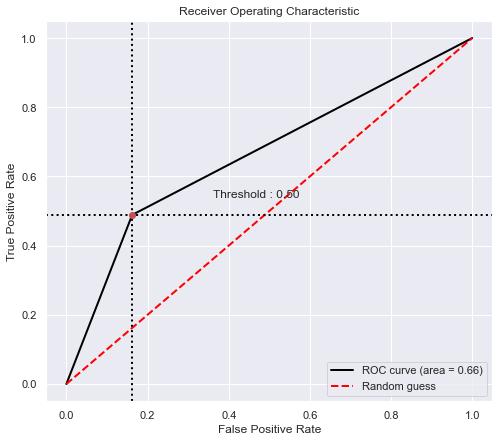

In [197]:
params = {'max_depth': range(7,14),'n_estimators':[300]}

CB = CatBoostClassifier()
CB = RandomizedSearchCV(CB,param_distributions=params, cv =5, scoring='recall', refit=True, n_jobs = -1,verbose=False)

CB.fit(X_train_scaled, y_train_os)
y_pred_CB = CB.predict(X_test_scaled)
cm_CB = confusion_matrix(y_pred_CB,y_test)
fscore_cb = f1_score(y_test,y_pred_CB)
acc_CB = accuracy_score(y_test, y_pred_CB)
CB.best_params_
result.append(acc_CB)
print("RESULTS :")
print("CatBoost Model Accuracy : ",round(acc_CB,2))
print("CatBoost Model F1-score : ",round(fscore_cb,2))
print("Classification Report :\n",classification_report(y_test,y_pred_CB))
print('\n')
print(CB.best_params_)
print('\n')
plot_confusion_matrix(y_test, y_pred_CB)
print('\n')
plot_roc_auc(y_test,y_pred_CB)

### What is the best model for this project?

#### As can be seen above, the best model that gives us the highest accuracy is LightGBM